# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [ ]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

# to make this notebook's output stable across runs

import math
from google.colab import files

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [ ]:
files.upload()

Saving housing_cali.csv to housing_cali.csv


{'housing_cali.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR B

In [ ]:
housing = pd.read_csv("housing_cali.csv")
print(housing.shape)
housing

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


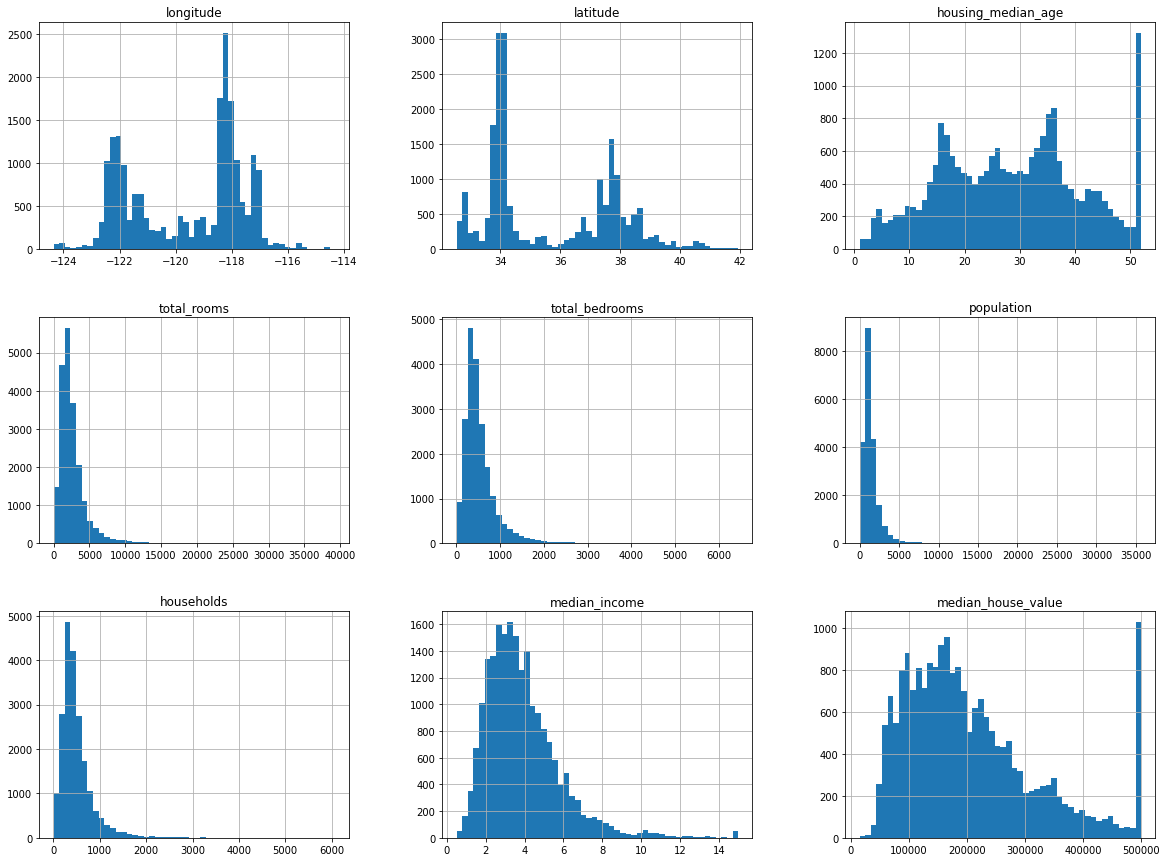

In [ ]:
#DISTRIBUTIONS OF NUMERICAL FEATURES
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5e5303290>,
      dtype=object)

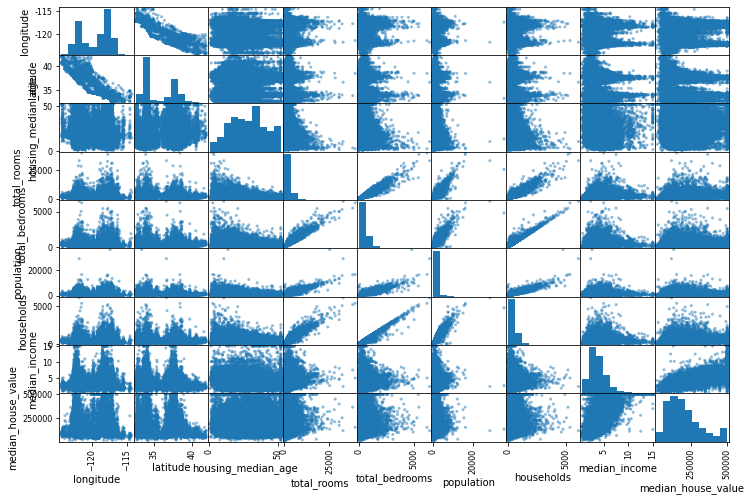

In [ ]:
corr_matrix = housing.corr()
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']], figsize=(12, 8))

In [ ]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
# Your code goes here for this section.

In [ ]:

cat_attribs = list(set(housing.columns) - set(housing._get_numeric_data().columns))
num_attribs = housing._get_numeric_data().columns


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ])



full_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_attribs),
        ("num", num_pipeline, num_attribs),

    ])

In [ ]:
print(cat_attribs)
print(num_attribs)

['ocean_proximity']
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(20640, 14)

In [ ]:
cat_updated_cols = full_pipeline.named_transformers_['cat']['encoder'].get_feature_names(cat_attribs)
columns = np.append(cat_updated_cols, num_attribs)
columns

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'longitude', 'latitude',
       'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype=object)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [237]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).


#Mikovski distance - choose distance metric by changing value of p 
def calc_distance(X1, X2, p): #for each row in df is a data point
    return sum(((X1 - X2)**p))**(1/p)

#Random Initialization
def clusterInit(numClust,df):
  init_centers = random.sample(range(0, len(df)), numClust)
  centers = []
  for i in init_centers:
    centers.append(df[i])
  centers = np.array(centers)
  return centers #returns list of k random points as initial centers 


def findClosestCenter(centroids, X): #takes in random centers, features 
    closest_center = []
    for i in X:
        distance=[]
        for j in centroids:
            distance.append(calc_distance(i, j, 2))
        closest_center.append(np.argmin(distance)) #store index of min distance (cluster #)
    return closest_center #returns list of cluster numbers each data point is in ie. [0, 2, 1, 1, 1, 0]


def get_new_centroids(clusters, X): #takes in cluster #s, features 
  new_centroids = []
  cluster_df = pd.concat([pd.DataFrame(X),pd.DataFrame(clusters, columns=['cluster #'])], axis=1)
  for c in set(cluster_df['cluster #']):
    cluster_mean = cluster_df[cluster_df['cluster #'] == c][cluster_df.columns[:-1]].mean(axis=0)
    new_centroids.append(cluster_mean)
  return np.array(new_centroids) #returns a list of k points (of n features), which are calculated means of points in each cluster 


def kmeans(K, X): 
  centers = clusterInit(K, X) #randomly initialize k-cluster center locations (POINTS)
  old_center_assignments = findClosestCenter(centers, X) #each data point finds out which center its closest to (CLUSTER NUMBERS)

  new_closestcenter_assignments = [None]*len(X)
  new_centers = [None]*K

  i = 0
  while(old_center_assignments !=  new_closestcenter_assignments): #checking if cluster numbers (cluster assignments) dont change membership
    if(i > 0):
      old_center_assignments = new_closestcenter_assignments
    new_centers = get_new_centroids(old_center_assignments, X) 
    new_closestcenter_assignments = findClosestCenter(new_centers, X) #keep reassinging centers 
    centers = new_centers
    i += 1
  
  return new_centers, new_closestcenter_assignments
#return final center points, cluster mean assignments for each center point 



In [ ]:
columns = list(columns)
columns.append('cluster #')
len(columns)

15

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


### Cluster Mean, Standard Deviation functions

In [ ]:
  #cluster mean, cluster std 
  def mean_std_df(X, clusterAssignments):
    cluster_means = []
    cluster_std = []


    cluster_df = pd.concat([pd.DataFrame(X),pd.DataFrame(clusterAssignments, columns=['cluster #'])],axis=1)
    cluster_df.columns=list(columns)
    for c in set(cluster_df['cluster #']):
      cluster_means.append(cluster_df[cluster_df['cluster #'] == c][cluster_df.columns[:-1]].mean(axis=0))
      cluster_std.append(cluster_df[cluster_df['cluster #'] == c][cluster_df.columns[:-1]].std(axis=0))
    
    cluster_means = np.array(cluster_means)
    cluster_std = np.array(cluster_std)

    return cluster_means, cluster_std, cluster_df

### SSE function

In [233]:
#sse 
def sse(cluster_df, cluster_means):
  sse = 0
  for c in set(cluster_df['cluster #']):
    sum_k = 0
    all_centroids_in_k = np.array(cluster_df[cluster_df['cluster #'] == c][cluster_df.columns[:-1]])
    for i in all_centroids_in_k:
      # sum_k += (calc_distance(i, cluster_means[c], 2))**2
      sum_k += np.sum((i - cluster_means[c])**2)
    
    sse += sum_k
  return sse



### Visualization Function

In [ ]:
def visualize(cluster_df, centers):
  groups = cluster_df.groupby('cluster #')

  for name, group in groups:
      plt.scatter(group.latitude, group.longitude, s = 10, label=name, alpha=.4)
  plt.legend() 

  for i in centers:
    plt.scatter(i[6],i[5], color='black')
  plt.show()


### Running k-means for different cluster sizes (k = 2,3,4,..,10)

#### k = 2

In [228]:
#using Manhattan distance
np.random.seed(500)
centers_2_dd, assignments_2_dd = kmeans(2, housing_prepared)
cluster_means_2_dd, cluster_std_2_dd, cluster_df_2_dd = mean_std_df(housing_prepared, assignments_2_dd)
cluster_df_2_dd
sse_2_dd = sse(cluster_df_2_dd, cluster_means_2_dd)
sse_2_dd 

199680.46579457357

In [234]:
# Sup distance
np.random.seed(500)
centers_2_dd_s, assignments_2_dd_s = kmeans(2, housing_prepared)
cluster_means_2_dd_s, cluster_std_2_dd_s, cluster_df_2_dd_s = mean_std_df(housing_prepared, assignments_2_dd_s)
cluster_df_2_dd_s
sse_2_dd_s = sse(cluster_df_2_dd_s, cluster_means_2_dd_s)
sse_2_dd_s


199680.46579457357

In [225]:
#Euclidean distance
np.random.seed(5000)
centers_2_dd_e, assignments_2_dd_e = kmeans(2, housing_prepared)
cluster_means_2_dd_e, cluster_std_2_dd_e, cluster_df_2_dd_e = mean_std_df(housing_prepared, assignments_2_dd_e)
cluster_df_2_dd_e
sse_2_dd_e = sse(cluster_df_2_dd_e, cluster_means_2_dd_e)
sse_2_dd_e

162314.81316218892

Cluster Means (k=2): [[ 1.84863086e-01  4.44823128e-01  0.00000000e+00  2.69126807e-01
   1.01186978e-01 -1.09334644e+00  1.10317890e+00  3.30252944e-02
  -3.23832801e-02 -7.25073421e-02 -1.22054425e-01 -7.14768956e-02
  -1.35405427e-02 -5.93423248e-02]
 [ 6.23444069e-01  2.28010881e-01  4.12167175e-04  0.00000000e+00
   1.48132883e-01  7.66901726e-01 -7.73798472e-01 -2.31648034e-02
   2.27144778e-02  5.08585421e-02  8.56121590e-02  5.01357600e-02
   9.49769002e-03  4.16242554e-02]]
Cluster STD (k=2): [[0.38820927 0.49697539 0.         0.44353206 0.30159387 0.42343684
  0.44712933 1.06230751 0.91092307 0.90114928 0.91165609 0.93383744
  0.98483457 1.01933201]
 [0.48454196 0.41956696 0.02029855 0.         0.3552463  0.38608394
  0.32987417 0.95327592 1.05749952 1.06099223 1.04920901 1.04106191
  1.01047456 0.984165  ]]
SSE (k=2) 162734.2797142866


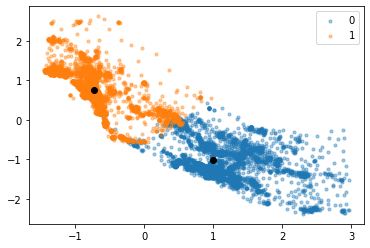

Centers:  [[ 2.40715268e-01  3.84685924e-01  0.00000000e+00  2.62494269e-01
   1.12104539e-01 -1.02467739e+00  9.93508153e-01  8.28655619e-02
   5.94691482e-02 -8.45982626e-04 -6.24288519e-02  2.38319708e-03
   1.52227736e-01  1.59114404e-01]
 [ 5.90466600e-01  2.68126888e-01  4.19603894e-04  0.00000000e+00
   1.40986908e-01  7.50191805e-01 -7.27372032e-01 -6.06679390e-02
  -4.35388426e-02  6.19364924e-04  4.57057154e-02 -1.74479786e-03
  -1.11449712e-01 -1.16491613e-01]]


In [194]:
#for Minkovski Distance, I decided to go with the Euclidean distance (p = 2) b/c it yielded sse's less than the Manhattan distance and the Sup distance (199680.46579457357 > 162314.81316218892)
centers_2, assignments_2 = kmeans(2, housing_prepared)
cluster_means_2, cluster_std_2, cluster_df_2 = mean_std_df(housing_prepared, assignments_2)
cluster_df_2
print("Cluster Means (k=2):", cluster_means_2)
print("Cluster STD (k=2):", cluster_std_2)
sse_2 = sse(cluster_df_2, cluster_means_2)
print("SSE (k=2)", sse_2)
visualize(cluster_df_2, centers_2)
print("Centers: ", centers_2)

#### k = 3

Cluster Means (k=3): [[ 1.91814294e-01  5.07177764e-01  0.00000000e+00  2.25870495e-01
   7.51374465e-02 -1.09896610e+00  1.18361979e+00 -2.61288902e-01
   5.14315014e-02  1.26098912e-02 -2.76126347e-02  9.49382663e-03
  -1.24875859e-01 -3.05510648e-01]
 [ 6.04695032e-01  4.52735276e-02  8.38398659e-04  1.69985328e-01
   1.79207713e-01  3.86739961e-02 -2.61113950e-01  5.34039732e-01
   2.46570003e-01  1.39080395e-01  1.57675150e-02  1.57496241e-01
   8.66335686e-01  1.29316840e+00]
 [ 5.35886707e-01  3.23355863e-01  1.07284626e-04  0.00000000e+00
   1.40650145e-01  7.52227916e-01 -6.97840115e-01 -8.97954975e-02
  -1.62338693e-01 -8.00474341e-02  1.13271879e-02 -8.72846414e-02
  -3.55712953e-01 -4.47293498e-01]]
Cluster STD (k=3): [[0.39375786 0.49998666 0.         0.41818623 0.26363313 0.41247481
  0.46966625 0.95333704 1.04730929 1.01845786 1.05210143 1.05143697
  0.81904854 0.75727088]
 [0.48896734 0.20792522 0.02894601 0.37565928 0.38356635 0.94593488
  0.80301951 1.02403525 1.31075

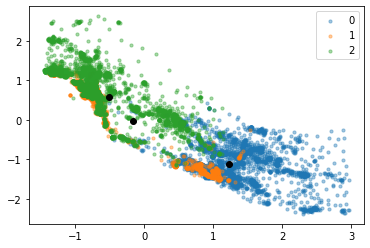

Centers:  [[ 2.03334019e-01  4.88577897e-01  0.00000000e+00  2.28442066e-01
   7.96460177e-02 -1.13257742e+00  1.22325379e+00 -6.06904444e-01
   1.67175924e-01  6.78141324e-02  1.78223530e-02  6.83436601e-02
   2.24042588e-01 -8.39863907e-02]
 [ 5.68950564e-01  8.04856895e-02  6.93842151e-04  1.80572420e-01
   1.69297485e-01 -4.18147562e-02 -1.55868459e-01  7.85626911e-01
   1.28873942e-01  1.07159770e-01  1.64977868e-02  1.28143283e-01
   4.18301126e-01  8.83818680e-01]
 [ 4.86022364e-01  3.70706869e-01  9.98402556e-05  1.38777955e-02
   1.29293131e-01  5.73507963e-01 -5.03714906e-01 -1.57766618e-01
  -1.55278164e-01 -9.45771710e-02 -1.81418285e-02 -1.06911728e-01
  -3.49453767e-01 -4.67963740e-01]]


In [195]:
np.random.seed(500)
centers_3, assignments_3 = kmeans(3, housing_prepared)
cluster_means_3, cluster_std_3, cluster_df_3 = mean_std_df(housing_prepared, assignments_3)
cluster_df_3
print("Cluster Means (k=3):", cluster_means_3)
print("Cluster STD (k=3):", cluster_std_3)
sse_3 = sse(cluster_df_3, cluster_means_3)
print("SSE (k=3)", sse_3)
visualize(cluster_df_3, centers_3)
print("Centers: ", centers_3)

#### k = 4 

Cluster Means (k=4): [[ 1.67668044e-01  7.04280886e-01  0.00000000e+00  1.25797972e-02
   1.15471273e-01  2.98664596e-01 -2.29692716e-02 -5.30872831e-01
  -3.00482035e-01 -2.41888974e-01 -2.21917278e-01 -2.84327309e-01
  -5.38289813e-01 -7.73502574e-01]
 [ 6.65853262e-01  1.06068001e-01  8.13404913e-04  9.77712705e-02
   1.29494062e-01  2.68096067e-01 -3.87477682e-01  8.60557708e-01
  -5.22222461e-01 -4.88472476e-01 -4.00243947e-01 -4.79105097e-01
  -2.19221350e-01 -3.12422220e-02]
 [ 2.52716373e-01  3.50318471e-01  0.00000000e+00  2.83252154e-01
   1.13713001e-01 -1.00620541e+00  9.56433211e-01 -1.54474045e-01
   6.16342436e-01  6.48078956e-01  5.63503887e-01  6.62329209e-01
  -3.70853974e-02  8.10149789e-03]
 [ 7.31522591e-01  7.26038130e-02  0.00000000e+00  2.87281274e-02
   1.67145469e-01  5.56920951e-01 -6.79362975e-01 -4.27745385e-01
   3.97083536e-01  2.17157356e-01  1.65643044e-01  2.41283093e-01
   1.15237583e+00  1.11477536e+00]]
Cluster STD (k=4): [[0.37360631 0.45640818 0. 

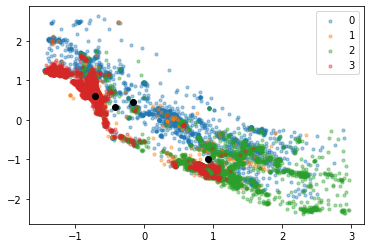

Centers:  [[ 1.57335907e-01  7.02123552e-01  0.00000000e+00  3.86100386e-03
   1.36679537e-01  4.44127966e-01 -1.63464198e-01 -5.52809483e-01
  -2.82318364e-01 -2.39820901e-01 -2.07202713e-01 -2.81436010e-01
  -5.03630041e-01 -7.64300033e-01]
 [ 7.17409730e-01  1.23749788e-01  6.78081031e-04  4.79742329e-02
   1.10188167e-01  3.18414479e-01 -4.19763951e-01  8.37369743e-01
  -4.99742958e-01 -4.78099258e-01 -3.75097336e-01 -4.65247454e-01
  -1.25715107e-01 -1.02065712e-02]
 [ 2.43434832e-01  3.18672467e-01  0.00000000e+00  3.14483647e-01
   1.23409054e-01 -9.93876002e-01  9.21271997e-01 -3.42601971e-02
   5.35986793e-01  5.68256654e-01  4.70531149e-01  5.80692143e-01
  -4.92033713e-02  8.27753317e-02]
 [ 7.68634466e-01  6.14192010e-02  2.98151461e-04  1.04353011e-02
   1.59212880e-01  5.93344802e-01 -7.14192962e-01 -5.55586746e-01
   3.23053909e-01  1.59633494e-01  1.08951222e-01  1.78287757e-01
   1.08998281e+00  1.04516883e+00]]


In [198]:
np.random.seed(1000)
centers_4, assignments_4 = kmeans(4, housing_prepared)
cluster_means_4, cluster_std_4, cluster_df_4 = mean_std_df(housing_prepared, assignments_4)
cluster_df_4
print("Cluster Means (k=4):", cluster_means_4)
print("Cluster STD (k=4):", cluster_std_4)
sse_4 = sse(cluster_df_4, cluster_means_4)
print("SSE (k=4)", sse_4)
visualize(cluster_df_4, centers_4)
print("Centers: ", centers_4)

#### k = 5

Cluster Means (k=5): [[ 6.28115265e-01  2.35202492e-01  7.78816199e-04  0.00000000e+00
   1.35903427e-01  7.72591579e-01 -7.65745782e-01  5.59882378e-01
  -5.33799526e-01 -4.67217408e-01 -3.42849430e-01 -4.65821812e-01
  -4.81121745e-01 -4.15982357e-01]
 [ 1.95605343e-01  6.00387764e-01  0.00000000e+00  1.30331754e-01
   7.36751400e-02 -9.33290777e-01  1.07908423e+00 -5.39114950e-01
  -2.70885847e-01 -3.38379467e-01 -3.51799665e-01 -3.57933647e-01
  -8.32791569e-02 -3.26631871e-01]
 [ 6.15238095e-01  5.56190476e-02  0.00000000e+00  1.34476190e-01
   1.94666667e-01  5.46693977e-02 -2.72039809e-01  1.39221091e-01
   1.45711717e-01 -1.42182094e-01 -2.13109300e-01 -1.19587189e-01
   1.66476598e+00  1.85662950e+00]
 [ 9.79310345e-02  3.50344828e-01  0.00000000e+00  4.40689655e-01
   1.11034483e-01 -1.20608691e+00  1.14393669e+00  9.78991734e-01
  -1.33004792e-01 -3.77466046e-02 -1.29511179e-01 -2.85814302e-02
  -5.21017264e-01 -2.95907497e-01]
 [ 5.81412779e-01  2.61195428e-01  1.87371182e-

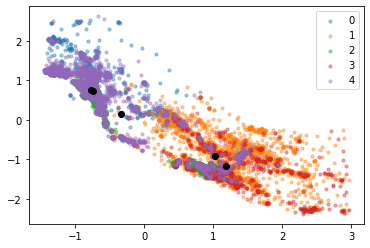

Centers:  [[ 6.32155477e-01  2.35689046e-01  0.00000000e+00  0.00000000e+00
   1.32155477e-01  7.63205014e-01 -7.62637517e-01  6.93229715e-01
  -5.07729527e-01 -3.34944497e-01 -9.20703605e-02 -3.33801584e-01
  -8.37437592e-01 -6.42583232e-01]
 [ 1.75236681e-01  5.63022090e-01  0.00000000e+00  1.77278634e-01
   8.44625951e-02 -9.23917372e-01  1.02829158e+00 -3.28849263e-01
  -2.84544070e-01 -3.54477522e-01 -3.72867460e-01 -3.68774922e-01
  -5.09795798e-02 -2.23368789e-01]
 [ 5.64989940e-01  9.57746479e-02  8.04828974e-04  1.28370221e-01
   2.10060362e-01  1.45454038e-01 -3.39392055e-01  1.64795614e-01
   3.46178665e-01  3.65301978e-02 -6.04188541e-02  5.47823747e-02
   1.65692041e+00  1.88971099e+00]
 [ 8.17710411e-02  4.42361388e-01  0.00000000e+00  3.84922218e-01
   9.09453530e-02 -1.16333313e+00  1.18761833e+00  9.26455445e-01
  -6.67811718e-02  3.74637268e-02 -4.04975838e-02  4.28669665e-02
  -6.29197725e-01 -5.18793378e-01]
 [ 6.45135244e-01  2.02395371e-01  4.03714170e-04  6.86314

In [202]:
np.random.seed(10000)
centers_5, assignments_5 = kmeans(5, housing_prepared)
cluster_means_5, cluster_std_5, cluster_df_5 = mean_std_df(housing_prepared, assignments_5)
cluster_df_5
print("Cluster Means (k=5):", cluster_means_5)
print("Cluster STD (k=5):", cluster_std_5)
sse_5 = sse(cluster_df_5, cluster_means_5)
print("SSE (k=5)", sse_5)
visualize(cluster_df_5, centers_5)
print("Centers: ", centers_5)

#### k = 6

Cluster Means (k=6): [[ 7.82493369e-02  8.27144120e-01  0.00000000e+00  6.18921309e-02
   3.27144120e-02 -7.98561378e-01  1.15363684e+00 -3.01481174e-01
  -2.96236716e-01 -3.03719593e-01 -3.28038778e-01 -3.34557426e-01
  -5.30543556e-01 -8.24282415e-01]
 [ 2.51880831e-01  4.96539272e-02  0.00000000e+00  5.27234427e-01
   1.71230816e-01 -1.30950422e+00  9.61079308e-01  6.77461696e-01
  -2.11333092e-01 -2.55530373e-01 -3.03877961e-01 -2.36373036e-01
   2.59177430e-01  5.81881813e-01]
 [ 6.37656576e-01  2.04331942e-01  6.52400835e-04  0.00000000e+00
   1.57359081e-01  8.13275343e-01 -8.24879861e-01  2.02335850e-01
  -3.48121550e-01 -2.80049587e-01 -1.89025309e-01 -2.76720226e-01
  -3.26462606e-01 -2.97202651e-01]
 [ 4.93681207e-01  3.20423971e-01  0.00000000e+00  6.93028944e-02
   1.16591928e-01  2.09810916e-01 -2.13721748e-01 -8.09502586e-01
   1.32807519e+00  1.46959519e+00  1.34706193e+00  1.47591991e+00
   1.00916992e-02  3.23810564e-02]
 [ 4.01459854e-01  4.45255474e-01  0.00000000e+

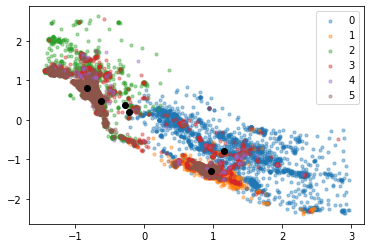

Centers:  [[ 7.82493369e-02  8.27144120e-01  0.00000000e+00  6.18921309e-02
   3.27144120e-02 -7.98561378e-01  1.15363684e+00 -3.01481174e-01
  -2.96236716e-01 -3.03719593e-01 -3.28038778e-01 -3.34557426e-01
  -5.30543556e-01 -8.24282415e-01]
 [ 2.51880831e-01  4.96539272e-02  0.00000000e+00  5.27234427e-01
   1.71230816e-01 -1.30950422e+00  9.61079308e-01  6.77461696e-01
  -2.11333092e-01 -2.55530373e-01 -3.03877961e-01 -2.36373036e-01
   2.59177430e-01  5.81881813e-01]
 [ 6.37656576e-01  2.04331942e-01  6.52400835e-04  0.00000000e+00
   1.57359081e-01  8.13275343e-01 -8.24879861e-01  2.02335850e-01
  -3.48121550e-01 -2.80049587e-01 -1.89025309e-01 -2.76720226e-01
  -3.26462606e-01 -2.97202651e-01]
 [ 4.93681207e-01  3.20423971e-01  0.00000000e+00  6.93028944e-02
   1.16591928e-01  2.09810916e-01 -2.13721748e-01 -8.09502586e-01
   1.32807519e+00  1.46959519e+00  1.34706193e+00  1.47591991e+00
   1.00916992e-02  3.23810564e-02]
 [ 4.01459854e-01  4.45255474e-01  0.00000000e+00  6.93430

In [204]:
np.random.seed(100)
centers_6, assignments_6 = kmeans(6, housing_prepared)
cluster_means_6, cluster_std_6, cluster_df_6 = mean_std_df(housing_prepared, assignments_6)
cluster_df_6
print("Cluster Means (k=6):", cluster_means_6)
print("Cluster STD (k=6):", cluster_std_6)
sse_6 = sse(cluster_df_6, cluster_means_6)
print("SSE (k=6)", sse_6)
visualize(cluster_df_6, centers_6)
print("Centers: ", centers_6)

#### k = 7

Cluster Means (k=7): [[ 2.54714157e-01  4.81891649e-02  0.00000000e+00  5.26189764e-01
   1.70906914e-01 -1.31168854e+00  9.64887670e-01  6.87855240e-01
  -2.06788609e-01 -2.42849496e-01 -2.91217180e-01 -2.23844624e-01
   2.15169651e-01  5.38273401e-01]
 [ 7.04178538e-01  7.02754036e-02  0.00000000e+00  4.51092118e-02
   1.80436847e-01  3.77516211e-01 -5.46953553e-01 -3.12308141e-02
  -1.86093070e-02 -3.04458993e-01 -3.36147645e-01 -2.88126041e-01
   1.80548469e+00  1.78539939e+00]
 [ 8.06270997e-02  8.30907055e-01  0.00000000e+00  5.84546473e-02
   3.00111982e-02 -8.09766602e-01  1.16958339e+00 -3.23799357e-01
  -2.86485057e-01 -2.95315817e-01 -3.21324081e-01 -3.25377754e-01
  -5.20132004e-01 -8.17602410e-01]
 [ 5.53893905e-01  2.62697517e-01  0.00000000e+00  0.00000000e+00
   1.83408578e-01  8.29139018e-01 -8.16325944e-01 -5.57469717e-01
   2.46099099e-01  3.72686714e-01  4.07387598e-01  3.72833446e-01
  -1.90892209e-01 -1.97004977e-01]
 [ 4.42211055e-01  3.91959799e-01  0.00000000e+

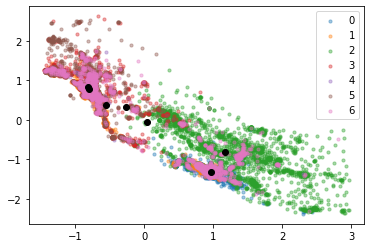

Centers:  [[ 2.54714157e-01  4.81891649e-02  0.00000000e+00  5.26189764e-01
   1.70906914e-01 -1.31168854e+00  9.64887670e-01  6.87855240e-01
  -2.06788609e-01 -2.42849496e-01 -2.91217180e-01 -2.23844624e-01
   2.15169651e-01  5.38273401e-01]
 [ 7.04178538e-01  7.02754036e-02  0.00000000e+00  4.51092118e-02
   1.80436847e-01  3.77516211e-01 -5.46953553e-01 -3.12308141e-02
  -1.86093070e-02 -3.04458993e-01 -3.36147645e-01 -2.88126041e-01
   1.80548469e+00  1.78539939e+00]
 [ 8.06270997e-02  8.30907055e-01  0.00000000e+00  5.84546473e-02
   3.00111982e-02 -8.09766602e-01  1.16958339e+00 -3.23799357e-01
  -2.86485057e-01 -2.95315817e-01 -3.21324081e-01 -3.25377754e-01
  -5.20132004e-01 -8.17602410e-01]
 [ 5.53893905e-01  2.62697517e-01  0.00000000e+00  0.00000000e+00
   1.83408578e-01  8.29139018e-01 -8.16325944e-01 -5.57469717e-01
   2.46099099e-01  3.72686714e-01  4.07387598e-01  3.72833446e-01
  -1.90892209e-01 -1.97004977e-01]
 [ 4.42211055e-01  3.91959799e-01  0.00000000e+00  7.03517

In [206]:
np.random.seed(100)
centers_7, assignments_7 = kmeans(7, housing_prepared)
cluster_means_7, cluster_std_7, cluster_df_7 = mean_std_df(housing_prepared, assignments_7)
cluster_df_7
print("Cluster Means (k=7):", cluster_means_7)
print("Cluster STD (k=7):", cluster_std_7)
sse_7 = sse(cluster_df_7, cluster_means_7)
print("SSE (k=7)", sse_7)
visualize(cluster_df_7, centers_7)
print("Centers: ", centers_7)

#### k = 8

Cluster Means (k=8): [[ 3.24574209e-01  5.54744526e-02  0.00000000e+00  4.15571776e-01
   2.04379562e-01 -1.28807478e+00  9.15730726e-01  2.54066931e-01
  -8.82961287e-03 -1.74272130e-01 -2.27730469e-01 -1.42105770e-01
   1.05889919e+00  1.30178513e+00]
 [ 4.48979592e-01  3.82653061e-01  0.00000000e+00  7.14285714e-02
   9.69387755e-02  3.24440247e-01 -2.68382794e-01 -1.38538376e+00
   6.08624004e+00  5.78965249e+00  5.65831865e+00  5.80855795e+00
   4.15327720e-01  1.59537827e-01]
 [ 5.54124502e-01  2.64029439e-01  0.00000000e+00  0.00000000e+00
   1.81846059e-01  8.52635912e-01 -8.33817185e-01 -5.34724489e-01
   2.75305868e-01  4.22560610e-01  4.61884540e-01  4.21202579e-01
  -2.29517572e-01 -2.26934168e-01]
 [ 4.56153279e-01  3.42667649e-01  0.00000000e+00  1.01694915e-01
   9.94841562e-02  2.62655857e-02 -2.91593517e-02 -8.94110261e-01
   1.94385996e+00  2.05469449e+00  1.85207481e+00  2.05772422e+00
   1.41740097e-01  1.37923733e-01]
 [ 7.62758621e-01  6.34482759e-02  4.59770115e-

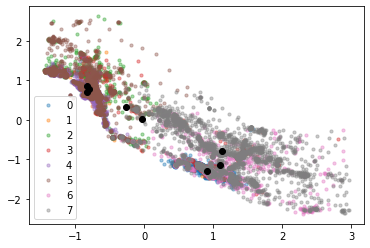

Centers:  [[ 3.24574209e-01  5.54744526e-02  0.00000000e+00  4.15571776e-01
   2.04379562e-01 -1.28807478e+00  9.15730726e-01  2.54066931e-01
  -8.82961287e-03 -1.74272130e-01 -2.27730469e-01 -1.42105770e-01
   1.05889919e+00  1.30178513e+00]
 [ 4.48979592e-01  3.82653061e-01  0.00000000e+00  7.14285714e-02
   9.69387755e-02  3.24440247e-01 -2.68382794e-01 -1.38538376e+00
   6.08624004e+00  5.78965249e+00  5.65831865e+00  5.80855795e+00
   4.15327720e-01  1.59537827e-01]
 [ 5.54124502e-01  2.64029439e-01  0.00000000e+00  0.00000000e+00
   1.81846059e-01  8.52635912e-01 -8.33817185e-01 -5.34724489e-01
   2.75305868e-01  4.22560610e-01  4.61884540e-01  4.21202579e-01
  -2.29517572e-01 -2.26934168e-01]
 [ 4.56153279e-01  3.42667649e-01  0.00000000e+00  1.01694915e-01
   9.94841562e-02  2.62655857e-02 -2.91593517e-02 -8.94110261e-01
   1.94385996e+00  2.05469449e+00  1.85207481e+00  2.05772422e+00
   1.41740097e-01  1.37923733e-01]
 [ 7.62758621e-01  6.34482759e-02  4.59770115e-04  0.00000

In [207]:
np.random.seed(100)
centers_8, assignments_8 = kmeans(8, housing_prepared)
cluster_means_8, cluster_std_8, cluster_df_8 = mean_std_df(housing_prepared, assignments_8)
cluster_df_8
print("Cluster Means (k=8):", cluster_means_8)
print("Cluster STD (k=8):", cluster_std_8)
sse_8 = sse(cluster_df_8, cluster_means_8)
print("SSE (k=8)", sse_8)
visualize(cluster_df_8, centers_8)
print("Centers: ", centers_8)

#### k = 9

Cluster Means (k=9): [[ 5.90078329e-01  2.69364665e-01  0.00000000e+00  0.00000000e+00
   1.40557006e-01  8.37143177e-01 -8.08913028e-01 -7.10508047e-01
   8.88699318e-01  1.08874094e+00  1.03561745e+00  1.07615687e+00
  -1.20688510e-01 -6.79969551e-02]
 [ 4.62635482e-01  1.52880776e-01  0.00000000e+00  2.22475756e-01
   1.62007986e-01 -1.19230401e+00  8.92395359e-01 -4.76296096e-01
  -6.22710029e-02 -2.15625215e-01 -2.10413343e-01 -1.87968650e-01
   6.91285901e-01  6.65681180e-01]
 [ 5.92815463e-01  2.41976659e-01  3.64697301e-04  0.00000000e+00
   1.64843180e-01  8.24190893e-01 -8.14197114e-01  3.34278230e-01
  -4.50321978e-01 -3.62144071e-01 -2.35848527e-01 -3.63110302e-01
  -5.14167564e-01 -4.95024272e-01]
 [ 5.95177665e-01  5.96446701e-02  0.00000000e+00  1.56091371e-01
   1.89086294e-01 -2.71309770e-02 -1.94521306e-01  1.91796948e-01
   9.76304498e-02 -3.31888195e-01 -3.29981351e-01 -3.12970833e-01
   3.01947612e+00  2.36033615e+00]
 [ 1.19037004e-01  1.12349532e-01  0.00000000e+

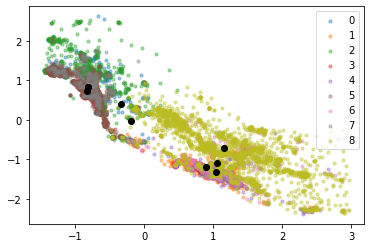

Centers:  [[ 5.90078329e-01  2.69364665e-01  0.00000000e+00  0.00000000e+00
   1.40557006e-01  8.37143177e-01 -8.08913028e-01 -7.10508047e-01
   8.88699318e-01  1.08874094e+00  1.03561745e+00  1.07615687e+00
  -1.20688510e-01 -6.79969551e-02]
 [ 4.62635482e-01  1.52880776e-01  0.00000000e+00  2.22475756e-01
   1.62007986e-01 -1.19230401e+00  8.92395359e-01 -4.76296096e-01
  -6.22710029e-02 -2.15625215e-01 -2.10413343e-01 -1.87968650e-01
   6.91285901e-01  6.65681180e-01]
 [ 5.92815463e-01  2.41976659e-01  3.64697301e-04  0.00000000e+00
   1.64843180e-01  8.24190893e-01 -8.14197114e-01  3.34278230e-01
  -4.50321978e-01 -3.62144071e-01 -2.35848527e-01 -3.63110302e-01
  -5.14167564e-01 -4.95024272e-01]
 [ 5.95177665e-01  5.96446701e-02  0.00000000e+00  1.56091371e-01
   1.89086294e-01 -2.71309770e-02 -1.94521306e-01  1.91796948e-01
   9.76304498e-02 -3.31888195e-01 -3.29981351e-01 -3.12970833e-01
   3.01947612e+00  2.36033615e+00]
 [ 1.19037004e-01  1.12349532e-01  0.00000000e+00  6.21043

In [208]:
np.random.seed(100)
centers_9, assignments_9 = kmeans(9, housing_prepared)
cluster_means_9, cluster_std_9, cluster_df_9 = mean_std_df(housing_prepared, assignments_9)
cluster_df_9
print("Cluster Means (k=9):", cluster_means_9)
print("Cluster STD (k=9):", cluster_std_9)
sse_9 = sse(cluster_df_9, cluster_means_9)
print("SSE (k=9)", sse_9)
visualize(cluster_df_9, centers_9)
print("Centers: ", centers_9)

#### k = 10 

Cluster Means (k=10): [[ 3.83421805e-01  3.75255206e-01  0.00000000e+00  0.00000000e+00
   2.41322989e-01  9.73986890e-01 -8.83046641e-01 -7.80405590e-01
  -3.15496420e-01 -2.84506944e-01 -2.89295471e-01 -3.11929700e-01
  -2.38167140e-01 -4.18458400e-01]
 [ 4.40789474e-01  4.01315789e-01  0.00000000e+00  6.57894737e-02
   9.21052632e-02  3.20740997e-01 -2.56310395e-01 -1.44917000e+00
   6.64786408e+00  6.29078469e+00  6.09320335e+00  6.26029899e+00
   4.46789961e-01  1.51178157e-01]
 [ 7.58865248e-01  1.28117136e-01  9.15122398e-04  0.00000000e+00
   1.12102494e-01  7.13725886e-01 -7.76840127e-01  7.89178233e-01
  -4.86734440e-01 -4.32236148e-01 -3.03009824e-01 -4.20000203e-01
  -3.56613805e-01 -2.43364887e-01]
 [ 7.68310912e-01  5.82959641e-02  4.98256104e-04  0.00000000e+00
   1.72894868e-01  6.96514122e-01 -8.25351080e-01  4.38088663e-02
  -2.25211493e-02 -2.68179665e-01 -3.12744168e-01 -2.51542819e-01
   1.47818599e+00  1.62153565e+00]
 [ 1.45869947e-01  1.72671353e-01  0.00000000e

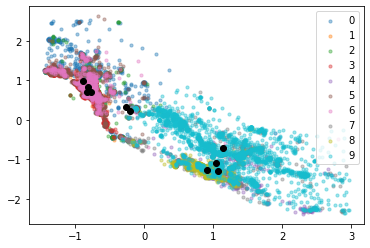

Centers:  [[ 3.83421805e-01  3.75255206e-01  0.00000000e+00  0.00000000e+00
   2.41322989e-01  9.73986890e-01 -8.83046641e-01 -7.80405590e-01
  -3.15496420e-01 -2.84506944e-01 -2.89295471e-01 -3.11929700e-01
  -2.38167140e-01 -4.18458400e-01]
 [ 4.40789474e-01  4.01315789e-01  0.00000000e+00  6.57894737e-02
   9.21052632e-02  3.20740997e-01 -2.56310395e-01 -1.44917000e+00
   6.64786408e+00  6.29078469e+00  6.09320335e+00  6.26029899e+00
   4.46789961e-01  1.51178157e-01]
 [ 7.58865248e-01  1.28117136e-01  9.15122398e-04  0.00000000e+00
   1.12102494e-01  7.13725886e-01 -7.76840127e-01  7.89178233e-01
  -4.86734440e-01 -4.32236148e-01 -3.03009824e-01 -4.20000203e-01
  -3.56613805e-01 -2.43364887e-01]
 [ 7.68310912e-01  5.82959641e-02  4.98256104e-04  0.00000000e+00
   1.72894868e-01  6.96514122e-01 -8.25351080e-01  4.38088663e-02
  -2.25211493e-02 -2.68179665e-01 -3.12744168e-01 -2.51542819e-01
   1.47818599e+00  1.62153565e+00]
 [ 1.45869947e-01  1.72671353e-01  0.00000000e+00  5.45254

In [209]:
np.random.seed(1000)
centers_10, assignments_10 = kmeans(10, housing_prepared)
cluster_means_10, cluster_std_10, cluster_df_10 = mean_std_df(housing_prepared, assignments_10)
cluster_df_10
print("Cluster Means (k=10):", cluster_means_10)
print("Cluster STD (k=10):", cluster_std_10)
sse_10 = sse(cluster_df_10, cluster_means_10)
print("SSE (k=10)", sse_10)
visualize(cluster_df_10, centers_10)
print("Centers: ", centers_10)

#### Observations

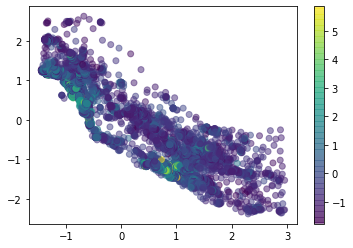

In [64]:
# median income
fig, ax = plt.subplots()
im = ax.scatter(cluster_df_2['latitude'],cluster_df_2['longitude'], c=cluster_df_2['median_income'], alpha=.5)
fig.colorbar(im, ax=ax)


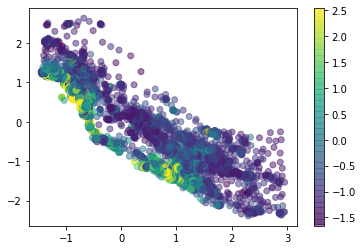

In [ ]:
# median house value
fig, ax = plt.subplots()
im = ax.scatter(cluster_df_2['latitude'],cluster_df_2['longitude'], c=cluster_df_2['median_house_value'], alpha=.5)
fig.colorbar(im, ax=ax)


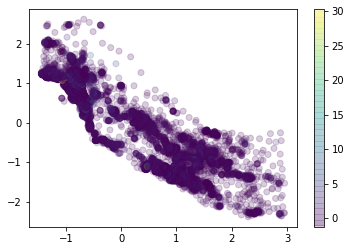

In [ ]:
#population
fig, ax = plt.subplots()
im = ax.scatter(cluster_df_2['latitude'],cluster_df_2['longitude'], c=cluster_df_2['population'], alpha=.2)
fig.colorbar(im, ax=ax)

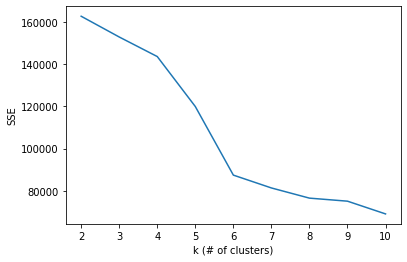

In [239]:
#elbow plot
all_sse = [sse_2, sse_3, sse_4, sse_5, sse_6, sse_7, sse_8, sse_9, sse_10]
k_range = list(range(2, 11))
all_sse
k_range
plt.plot(k_range,all_sse)
plt.xlabel("k (# of clusters)")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Your paragraph goes here for this section

As I increased the number of clusters or the value of k, every region divided further and became a more unique cluster. And it was very evident that geographical differences are what distinguished different clusters.  For example, the Bay area was divided into at least 3 different clusters when looking at executions for k greater than or equal to 8.  This can be attributed to the fact that the Bay area consists of microclimates, where SF, North Bay, East Bay, South Bay, and the Peninsula all have different geographic terrains and weather inspite of their proximity in distance. Likewise a set of clusters are seen for the middle of California which consists of the Central coast, San Joaquin Valley, and Sierra Nevada. And lastly, a set of clusters are seen for Southern California where subtropical climates and desert climates are split amongst 2-3 clusters.  More specifically, this is seen with Southern California cities like LA being one cluster (close to the ocean) and cities closer to the Desert and lower San Joaquin being 1-2 clusters.  Urban and rural places also seem to be clustered together.  This is seen with some of the clusters in mid California as well as some of the clusters bordering and with in the desert regions of California (East side). As I increased the number of clusters, I also noticed that many of my clusters were overlapping and were spanning across geographical distances.  I think this could be attributed to the fact that either regions with same population densities were grouped together or regions with similar median house values and incomes were grouped together.  Furthermore, since we are trying to project multiple dimensions on a two dimensional plot, overlapping is inevitable.  Lastly, by increasing the clusters sizes, I noticed that the SSEs progressively decreased.  




- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



As mentioned above, one of more important features in distinguishing different clusters was geographical differences; in our case ocean proximity and latitude/longitude.  That being said most cities and places with the most urban development tend to be concentrated closer to coasts and bays.  Not only is this pattern evident in California, but we see this with other cities across the United States (ie. New York City, Detroit, Chicago, etc.)
 With regards to California and the visualizations above, a lot of the clusters centroids are cities that could possibly be representing SF, LA, Sacramento, San Jose, and Palm Springs.  And all of these centroids are located close to an ocean, bay, or coast. Consequently, more populations are concentrated in these areas and this is evident in the third non-kmeans plot that I plottted above of California based on different region populations.  However, in these cities the standard of living is high due  to the fact that Southern California is the hub of the entertainment industry and Northern California is the hub of the tech industry. This is also evident in the first two non-kmeans visualizations that I plotted where the higher median incomes and median house values are concentrated along the coasts and across cities that look like SF and LA. Nevertheless, there is still a decent portion of median incomes that aren't in the higher ranges where the highest median house values are located. This means that not everyone is able to afford houses in those areas, which could possibly be the reason of homelessness in those areas.  Possible solutions to this crisis include forcing populations to disperse more to rural areas and mid California.  Of course, this would involve bringing more development and job opportunities to these areas. However it is important to keep in mind the standard of living that the pay of these jobs would provide.  For instance, just because more jobs are being moved to these more isolated areas, the median house values should not immediately shoot up.  There should be more affordable housing and housing values should be scaled to the salaries and incomes provided by these new jobs.  
 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!